# NORTHWIND DATABASE

The Northwind database is a sample database used by Microsoft to demonstrate the features of some of its products,
including SQL Server and Microsoft Access. 
The database contains the sales data for Northwind Traders, a fictitious specialty foods exportimport company

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import sqlalchemy

In [2]:
conn = ps.connect(dbname="capstone",
                  user="postgres",
                  password="mrt22",
                  port = "5432")

## MONTHLY SALES

In [3]:
sql = """
select to_char(order_date, 'yy-mm') as "order month",
count(o.order_id) as order_count,
sum(quantity) as product_count,
sum(unit_price*quantity*(1-discount)) as "sales revenue",
sum(unit_price*quantity*(1-discount))/sum(quantity) as "revenue per product"
from orders as o
inner join order_details as od
using(order_id)
group by 1
order by 1
"""

In [4]:
df = sqlio.read_sql_query(sql,conn)
df.head()

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,order month,order_count,product_count,sales revenue,revenue per product
0,96-07,59,1462,27861.895130,19.057384
1,96-08,69,1322,25485.275071,19.277818
2,96-09,57,1124,26381.400133,23.470997
3,96-10,73,1738,37515.724945,21.585572
4,96-11,66,1735,45600.045211,26.282447


## ORDER QUANTITY VS PRODUCT QUANTITY

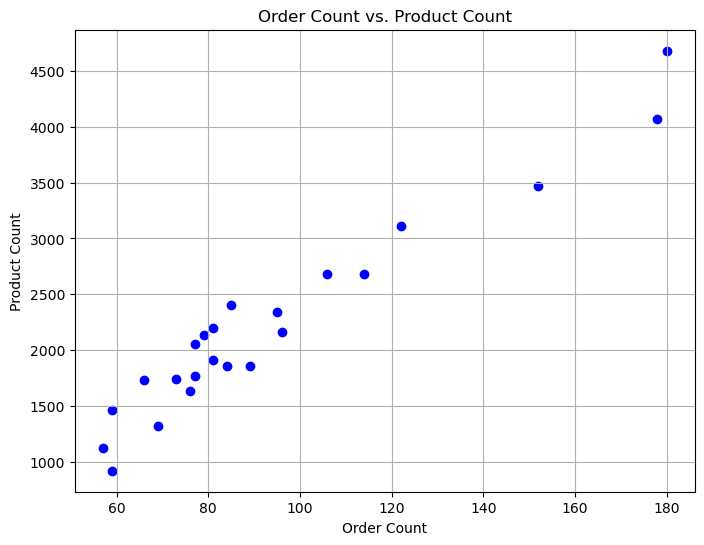

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['order_count'], df['product_count'], c='b', marker='o')
plt.title('Order Count vs. Product Count')
plt.xlabel('Order Count')
plt.ylabel('Product Count')
plt.grid(True)
plt.show()


 The number of orders and the number of products can be said to be directly proportional

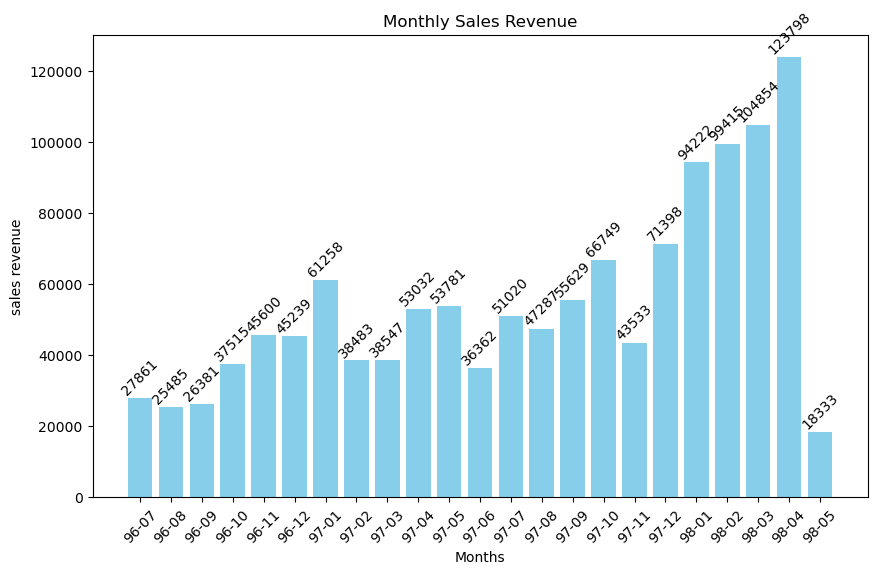

In [6]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df['order month'], df['sales revenue'], color='skyblue')
plt.xlabel('Months')
plt.ylabel('sales revenue')
plt.title('Monthly Sales Revenue')
plt.xticks(rotation=45)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10, rotation=45)

plt.show()

 There is a general increase in the number of orders over time, but serious activity has started since December 1997.
 It can be said that it happened since February 1998. Although the number of orders decreased, revenue and revenue per product increased.
 It should be noted that although the last month seems low, it is actually a good sales figure since the first 6 days are included.
  Small differences between product quantities and order numbers show themselves in sales revenue and income per product
 Another remarkable situation is that the revenue per product has increased significantly over the months (except for the last month).
 Especially in 1998, there was a serious upward trend in all areas such as the number of orders, number of products, sales revenue and income per product.

## Sales per Day of Week

In [7]:
sql= """
select to_char(order_date, 'day') as "order day",
count(o.order_id) as "order count",
sum(quantity) as "product count",
sum(unit_price*quantity*(1-discount)) as "sales revenue",
sum(unit_price*quantity*(1-discount))/sum(quantity) as "revenue per product"
from orders as o
inner join order_details as od
using(order_id)
group by 1
order by 2
"""

In [8]:
df = sqlio.read_sql_query(sql,conn)
df.head()

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,order day,order count,product count,sales revenue,revenue per product
0,monday,417,9938,258665.948827,26.027968
1,tuesday,425,10096,257549.766337,25.510080
2,friday,428,10541,269077.618889,25.526764
3,thursday,436,9983,236813.678983,23.721695
4,wednesday,449,10759,243686.025618,22.649505


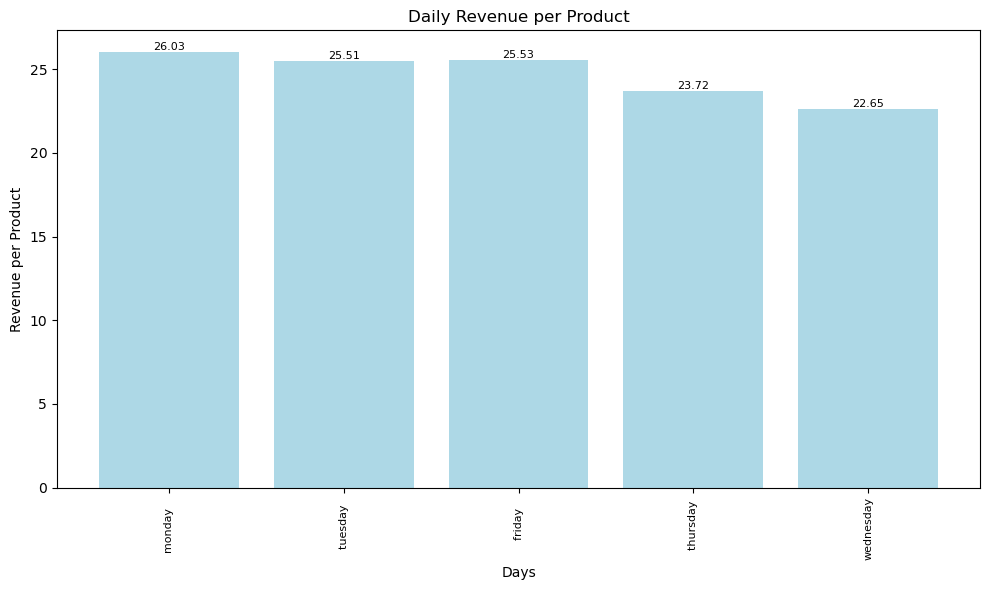

In [9]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df['order day'], df['revenue per product'], color='lightblue')
plt.xlabel('Days')
plt.ylabel('Revenue per Product')
plt.title('Daily Revenue per Product')
plt.xticks(rotation=90, fontsize=8) 


for bar, price in zip(bars, df['revenue per product']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{price:.2f}', 
             ha='center', va='bottom', fontsize=8, rotation=0, color='black')

plt.tight_layout()  
plt.show()

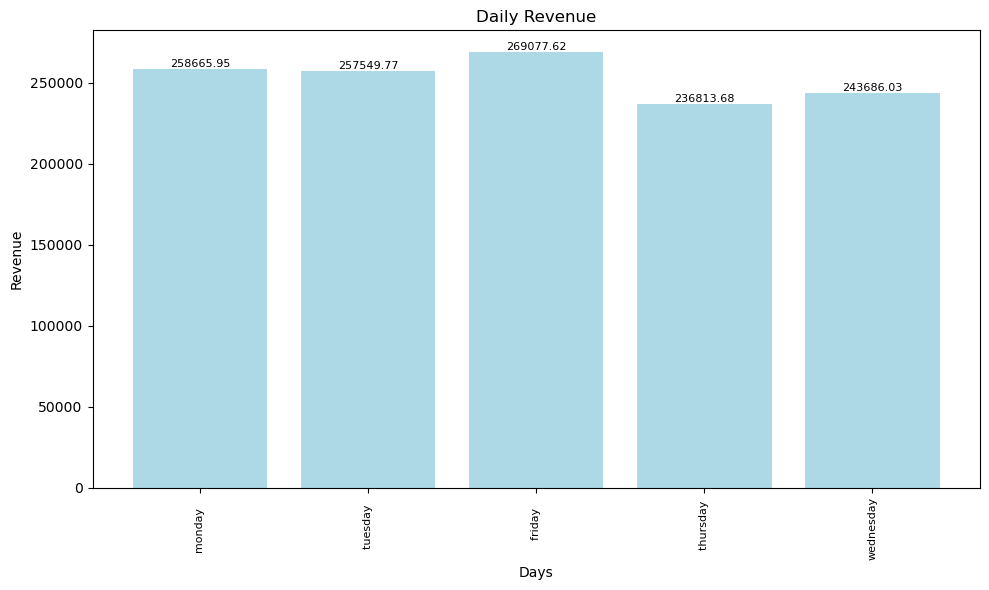

In [10]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df['order day'], df['sales revenue'], color='lightblue')
plt.xlabel('Days')
plt.ylabel('Revenue')
plt.title('Daily Revenue')
plt.xticks(rotation=90, fontsize=8) 


for bar, price in zip(bars, df['sales revenue']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{price:.2f}', 
             ha='center', va='bottom', fontsize=8, rotation=0, color='black')

plt.tight_layout()  
plt.show()

 ### While the highest quantities of orders and products are reached on Wednesdays and the lowest quantities  are reached on Mondays, the opposite situation is observed in terms of revenue per product, that is,  while more units of cheap products are sold on Wednesdays, fewer units of relatively expensive products are sold on Mondays. In line with this data, special campaigns can be considered for the day.
 ..


##  Insufficient / Enough Stock  Info

In [11]:
sql= """
with order_situation  as (select product_id,
unit_in_stock,
reorder_level,
case
when unit_in_stock > reorder_level then 1 else 0 end as no_order,
case 
when unit_in_stock <= reorder_level then 1 else 0 end as place_order
from products)
select sum(place_order) as below_stock,
sum(no_order) as enough_stock,
sum(no_order)*100/count(*) as "below stock product percentage %" 
from order_situation
"""

In [12]:
df = sqlio.read_sql_query(sql,conn)
df.head()

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,below_stock,enough_stock,below stock product percentage %
0,22,55,71


 ## As it can be seen from the query, under-stock products have reached a very high rate of 28% . It should be investigated why this rate is so high
 ...
 

## CATEGORICAL DISTRIBUTION OF INSUFFICIENT STOCKS

In [13]:
sql="""
select category_id,
count(product_id)
from products where unit_in_stock<=reorder_level
group by 1
order by 2 desc, 1 asc
"""

In [14]:
df = sqlio.read_sql_query(sql,conn)
df.head()

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,category_id,count
0,3,4
1,1,3
2,2,3
3,4,3
4,6,3


### No prominent suppliers due to stock shortage
..
..


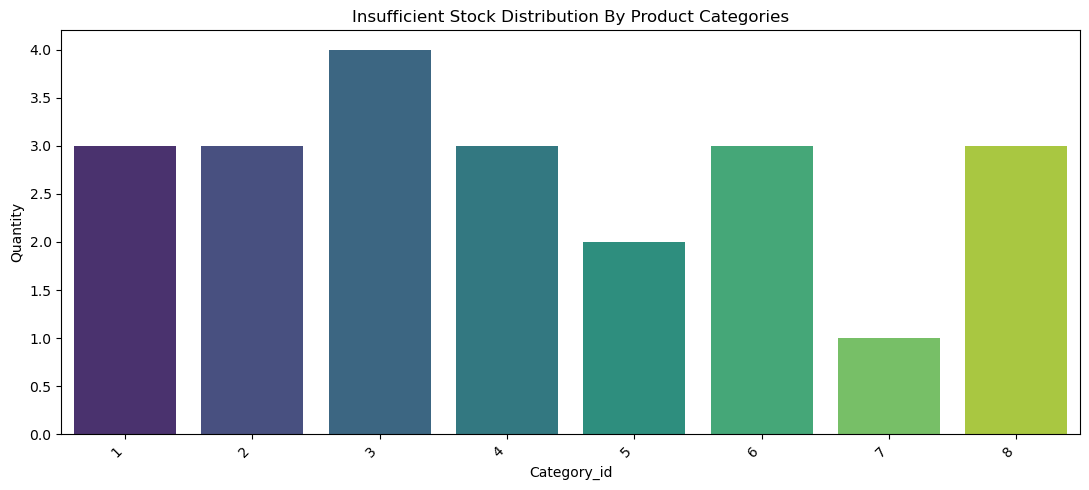

In [15]:
plt.figure(figsize=(11, 5))
sns.barplot(data=df, x='category_id', y='count', palette='viridis')
plt.title('Insufficient Stock Distribution By Product Categories')
plt.xlabel('Category_id')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

 ### There is no category that stands out due to stock shortage
 ..
 

## Sales Quantity of Out of Stock Products

In [16]:
sql= """
select product_id ,
sum(quantity) as sales_quantity
from order_details 
where product_id in (5,17,29,31,53)
group by 1
order by 2 desc
"""
df = sqlio.read_sql_query(sql,conn)
df

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product_id,sales_quantity
0,31,1397
1,17,978
2,29,746
3,53,722
4,5,298


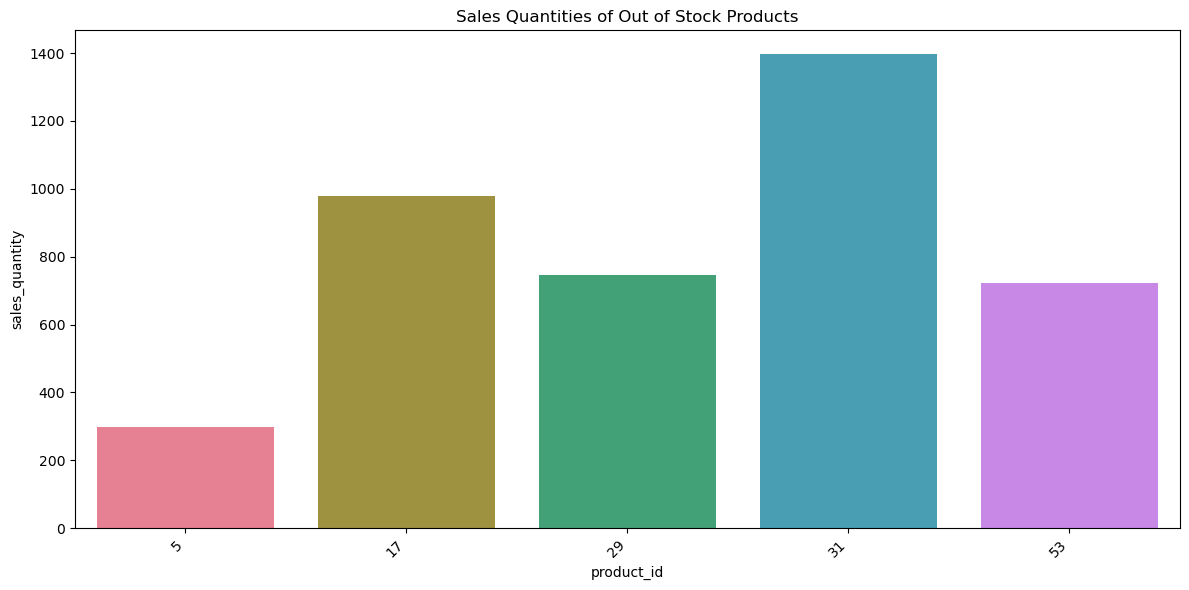

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='product_id', y='sales_quantity', palette='husl')
plt.title('Sales Quantities of Out of Stock Products')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### 31 and 17 are good selling products but they are out of stock, urgent action needed

## Product Sales Numbers and Revenues (top 10)

In [18]:
sql= """
select product_id ,
count(order_id) as order_quantity,
sum(quantity) as sales_quantity,
sum(unit_price*quantity*(1-discount))::integer as sales_revenue,
avg(discount)*100 as avr_discount_rate
from order_details 
group by 1
order by 4 desc
limit 10
"""

In [19]:
df = sqlio.read_sql_query(sql,conn)
df

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product_id,order_quantity,sales_quantity,sales_revenue,avr_discount_rate
0,38,24,623,141397,4.583333
1,29,32,746,80369,6.406250
2,59,54,1496,71156,4.722222
3,62,48,1083,47235,5.416667
4,60,51,1577,46825,6.392157
5,56,50,1263,42593,6.200000
6,51,39,886,41820,5.128205
7,17,37,978,32698,6.216216
8,18,27,539,29172,7.962963
9,28,33,640,25697,3.787879


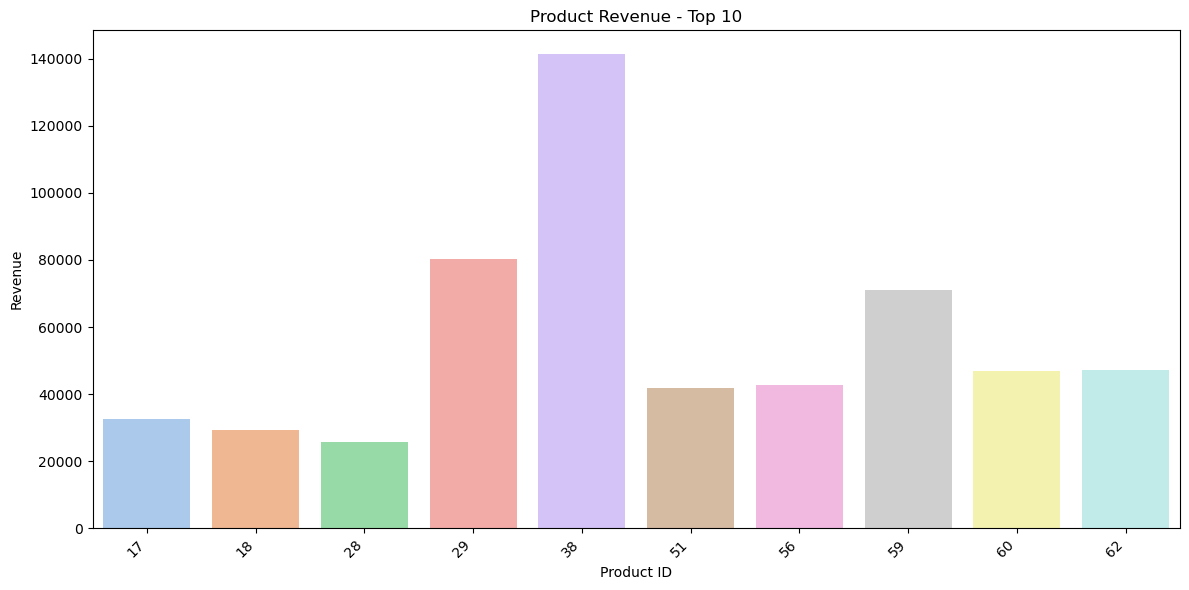

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='product_id', y='sales_revenue', palette='pastel')
plt.title('Product Revenue - Top 10')
plt.xlabel('Product ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## ARE THERE PRODUCTS THAT DO NOT HAVE GOOD SALES EVEN THE DISCOUNT RATES ARE HIGH? (TOP 10 ON DISCOUNT, LAST 20 ON SALE)

In [21]:
sql= """
with top_20 as 
(select product_id,
sum(quantity) as sales_quantity
from order_details
group by 1
order by 2 asc
limit 20),
bottom_10 as
(select product_id, avg(discount)*100 as "discount rate"
from order_details group by 1
order by 2 desc 
limit 10)
select * from top_20
inner join bottom_10
using(product_id)
"""

In [22]:
df = sqlio.read_sql_query(sql,conn)
df

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product_id,sales_quantity,discount rate
0,9,95,10.000000
1,48,138,10.833334
2,25,318,8.611111


### The marketing strategy for these products should be reviewed.  (of course, the query could have been, for example, the first 20 on discount or the last 15 on sale,  it was just a way we followed to identify the products that we thought were not worth the discount,  without keeping the range too wide)
..

##  PRODUCT PRICE CHANGES

In [23]:
sql= """
with empty as (
	with all_prices as (
	select product_id, unit_price, o.order_date,
	lag(unit_price) over(partition by product_id order by order_date) as previous_price
	from order_details as od
	left join orders as o using(order_id)
	order by 1,3
)
select product_id,
case
when previous_price is null then unit_price
when previous_price!= unit_price then unit_price
end as fiyat,
case
when previous_price is null then order_date
when previous_price!= unit_price then order_date
end as price_date
from all_prices
order by 1,3
)
select * from empty where fiyat is not null
"""

In [24]:
df2 = sqlio.read_sql_query(sql,conn)
df2

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product_id,fiyat,price_date
0,1,14.40,1996-08-20
1,1,18.00,1997-04-30
2,2,15.20,1996-07-12
3,2,19.00,1997-04-11
4,3,8.00,1996-08-26
...,...,...,...
152,75,7.75,1997-04-18
153,76,14.40,1996-07-29
154,76,18.00,1997-05-08
155,77,10.40,1996-07-15


## Sales Numbers and Daily Sales Numbers by Number of Sales Days

In [25]:
sql="""
with gün_sayısı as(
	with days as (
	select product_id, min(order_date) as first_order_date from order_details as od
inner join orders as o using(order_id)
group by 1
order by 1
)
select *,  '1998-05-07' - first_order_date  as day_count
from days
order by 3
),
sales_quantities as(
	select product_id ,
	sum(quantity) as sales_quantity
		from order_details 
		group by 1
		order by 2 desc
)
select sa.product_id,
sales_quantity,
row_number() over(order by sales_quantity desc) as sales_quantity_order,
row_number() over(order by sales_quantity*1.0 /day_count*1.0 desc) as daily_sales_quantity_order,
round((sales_quantity*1.0 /day_count*1.0), 4) as daily_average_sales,
day_count
from sales_quantities as sa
inner join 
gün_sayısı as gs
using(product_id)
order by 4
"""

In [26]:
df3 = sqlio.read_sql_query(sql,conn)
df3

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product_id,sales_quantity,sales_quantity_order,daily_sales_quantity_order,daily_average_sales,day_count
0,60,1577,1,1,2.3643,667
1,59,1496,2,2,2.2530,664
2,31,1397,3,3,2.0976,666
3,56,1263,4,4,1.9312,654
4,75,1155,6,5,1.8304,631
...,...,...,...,...,...,...
72,67,184,73,73,0.2939,626
73,48,138,74,74,0.2822,489
74,9,95,77,75,0.2017,471
75,15,122,76,76,0.1940,629


 ### It can be seen that, except for a few products such as 26 and 61, the low sales volume of the products is not due to the short sales period.

## Number of Sales Days

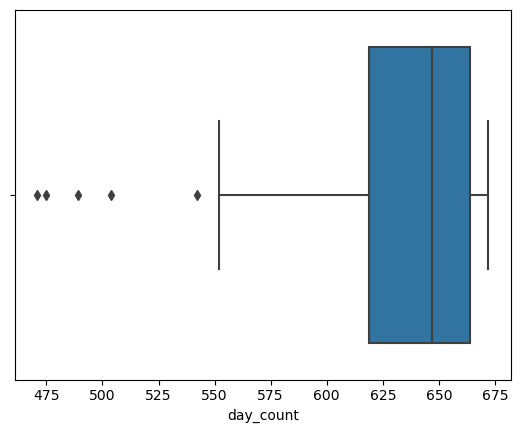

In [27]:
sns.boxplot(x = df3["day_count"]);

### Most of the products are sold between 550 and 675 days
..


## Sales Quantity Order vs Daily Sales Quantity Order

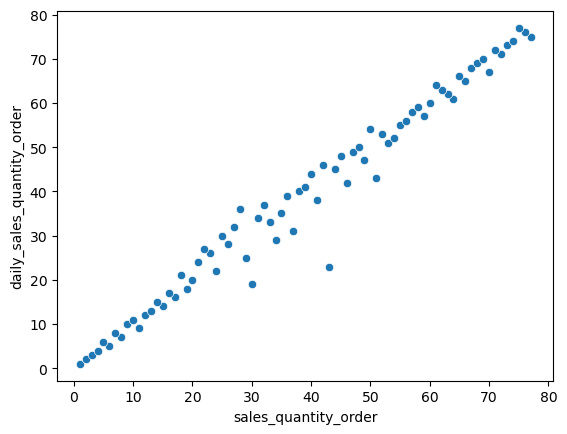

In [28]:
sns.scatterplot(x = "sales_quantity_order", y = "daily_sales_quantity_order", data = df3);

### There is almost a perfect direct relation between sales_quantity_order and daily_sales_quantity_order. Thats why we say except for a few products, the low sales volume of the products is not due to the short sales period.
..

## Distribution of Sales Quantities

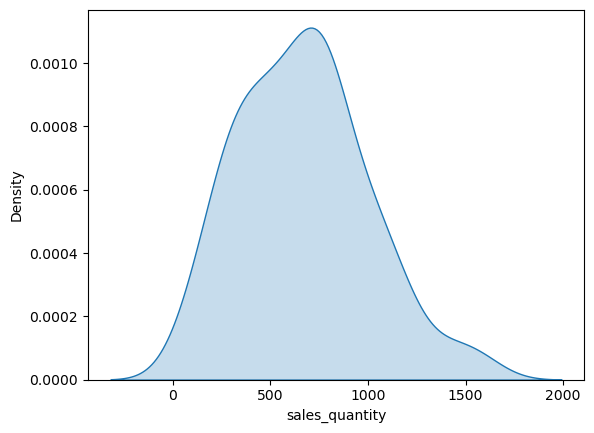

In [29]:
sns.kdeplot(df3.sales_quantity, shade= True);

## Averege Daily Sales Distribution

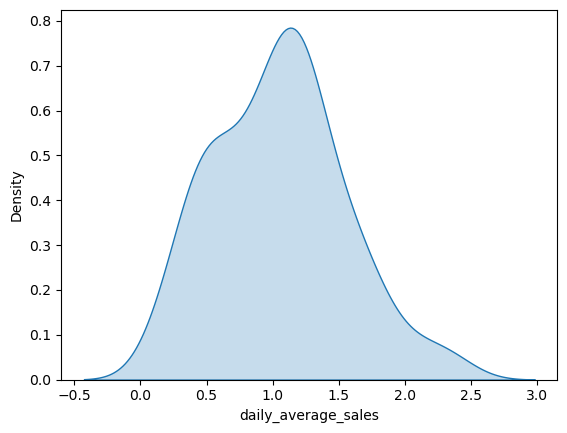

In [30]:
sns.kdeplot(df3["daily_average_sales"], shade = True);

## CUSTOMERS' R-F-M SCORES?

In [31]:
sql= """
select c.customer_id,
'1998-05-06' - max(order_date) as R,
case
when '1998-05-06' - max(order_date) between 0 and 7 then '5'
when '1998-05-06' - max(order_date) between 8 and 21 then '4'
when '1998-05-06' - max(order_date) between 22 and 45 then '3'
when '1998-05-06' - max(order_date) between 46 and 100 then '2'
else '1' end as recency_point,
count(distinct o.order_id) as F,
case
when count(distinct o.order_id) between 1 and 5 then '1'
when count(distinct o.order_id) between 6 and 8 then '2'
when count(distinct o.order_id) between 9 and 12 then '3'
else '4' end as freq_point,
sum(od.unit_price*quantity*(1-discount))::integer as M,
case
when sum(od.unit_price*quantity*(1-discount)) < 3000 then '1'
when sum(od.unit_price*quantity*(1-discount)) between 3000 and 6000 then '2'
when sum(od.unit_price*quantity*(1-discount)) between 6000.1 and 15000 then '3'
else '4' end as monetary_point
from orders as o
inner join order_details as od using(order_id)
inner join customers as c using(customer_id)
group by 1
order by 2, 4, 7 desc
"""

In [32]:
df4 = sqlio.read_sql_query(sql,conn)
df4

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,customer_id,r,recency_point,f,freq_point,m,monetary_point
0,SIMOB,0,5,7,2,16817,4
1,RICSU,0,5,10,3,19344,4
2,BONAP,0,5,17,4,21963,4
3,RATTC,0,5,18,4,51098,4
4,PERIC,1,5,6,2,4242,2
...,...,...,...,...,...,...,...
84,FAMIA,187,1,7,2,4108,2
85,MEREP,188,1,13,4,28872,4
86,HUNGC,240,1,5,1,3063,2
87,LAZYK,349,1,2,1,357,1


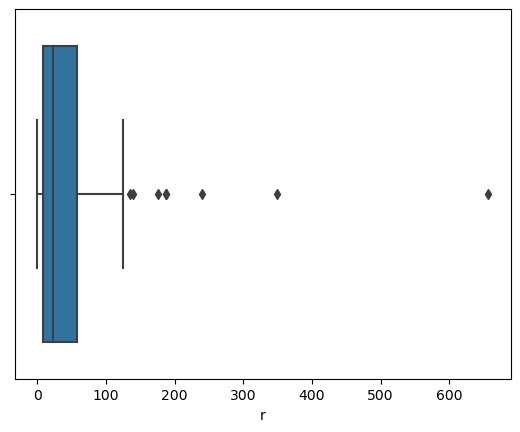

In [33]:
sns.boxplot(x = df4["r"]);

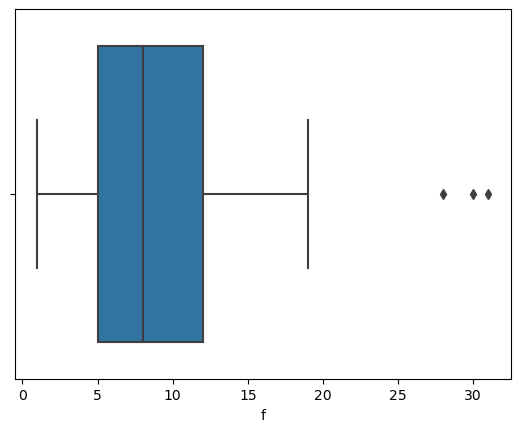

In [34]:
sns.boxplot(x = df4["f"]);

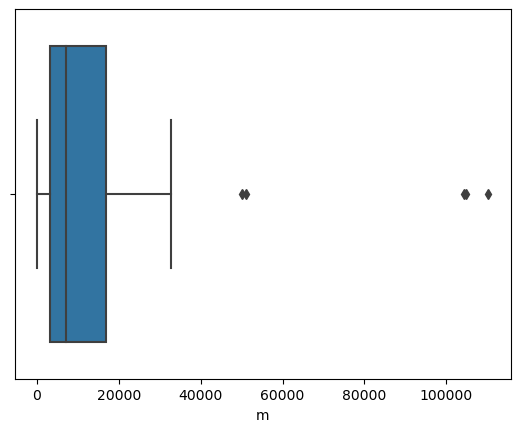

In [35]:
sns.boxplot(x = df4["m"]);

In [36]:
sql= """
with all_data as(
select c.customer_id,
'1998-05-06' - max(order_date) as R,
case
when '1998-05-06' - max(order_date) between 0 and 7 then 5
when '1998-05-06' - max(order_date) between 8 and 21 then 4
when '1998-05-06' - max(order_date) between 22 and 45 then 3
when '1998-05-06' - max(order_date) between 46 and 100 then 2
else 1 end as recency_point,
count(distinct o.order_id) as F,
case
when count(distinct o.order_id) between 1 and 5 then 1
when count(distinct o.order_id) between 6 and 8 then 2
when count(distinct o.order_id) between 9 and 12 then 3
else 4 end as freq_point,
sum(od.unit_price*quantity*(1-discount))::integer as M,
case
when sum(od.unit_price*quantity*(1-discount)) < 3000 then 1
when sum(od.unit_price*quantity*(1-discount)) between 3000 and 6000 then 2
when sum(od.unit_price*quantity*(1-discount)) between 6000.1 and 15000 then 3
else 4 end as monetary_point
from orders as o
inner join order_details as od using(order_id)
inner join customers as c using(customer_id)
group by 1
order by 4
)
select customer_id,
recency_point *freq_point *monetary_point as rfm_score
from all_data
order by 2 desc
"""

In [37]:
df5 = sqlio.read_sql_query(sql,conn)
df5

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,customer_id,rfm_score
0,BONAP,80
1,LEHMS,80
2,QUEEN,80
3,LILAS,80
4,ERNSH,80
...,...,...
84,TRAIH,1
85,CENTC,1
86,GROSR,1
87,LAUGB,1


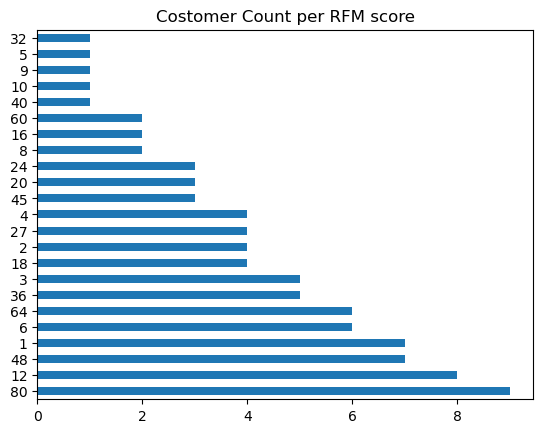

In [38]:
(df5["rfm_score"]
.value_counts()
.plot.barh()
.set_title("Costomer Count per RFM score"));

In [39]:
sql="""

with rfm_score as (
with all_data as(
select c.customer_id,
'1998-05-06' - max(order_date) as R,
case
when '1998-05-06' - max(order_date) between 0 and 7 then 5
when '1998-05-06' - max(order_date) between 8 and 21 then 4
when '1998-05-06' - max(order_date) between 22 and 45 then 3
when '1998-05-06' - max(order_date) between 46 and 100 then 2
else 1 end as recency_point,
count(distinct o.order_id) as F,
case
when count(distinct o.order_id) between 1 and 5 then 1
when count(distinct o.order_id) between 6 and 8 then 2
when count(distinct o.order_id) between 9 and 12 then 3
else 4 end as freq_point,
sum(od.unit_price*quantity*(1-discount))::integer as M,
case
when sum(od.unit_price*quantity*(1-discount)) < 3000 then 1
when sum(od.unit_price*quantity*(1-discount)) between 3000 and 6000 then 2
when sum(od.unit_price*quantity*(1-discount)) between 6000.1 and 15000 then 3
else 4 end as monetary_point
from orders as o
inner join order_details as od using(order_id)
inner join customers as c using(customer_id)
group by 1
order by 4
)
select customer_id,
recency_point *freq_point *monetary_point as rfm_score
	from all_data
	order by 2
)
select case
when rfm_score < 8 then '4th class'
when rfm_score between 8 and 19 then '3rd class'
when rfm_score between 20 and 48 then '2nd class'
else '1st class' end as rfm_segment,
count(customer_id) as customer_count
from rfm_score
group by 1
order by 1
"""

In [40]:
df6 = sqlio.read_sql_query(sql,conn)
df6

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,rfm_segment,customer_count
0,1st class,17
1,2nd class,27
2,3rd class,18
3,4th class,27


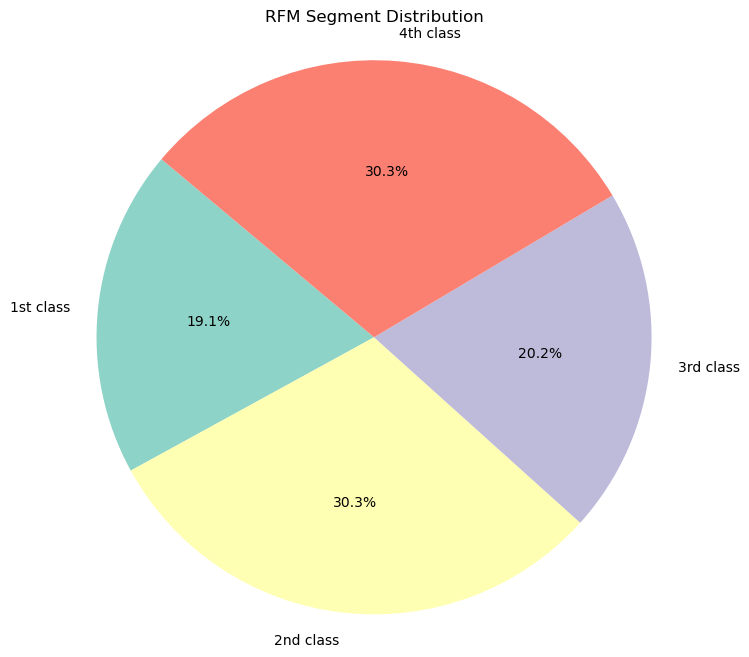

In [41]:
colors = sns.color_palette("Set3")

plt.figure(figsize=(8, 8))
plt.pie(df6.customer_count, labels=df6.rfm_segment, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("RFM Segment Distribution")
plt.axis('equal') 

plt.show()

 ### 17 first class customers, that is 19%, about 1 in 5 customers, I guess it's not a bad rate. But 27 4th class customers, 30%, that is, 3 out of 10 customers, need to be worked on More importantly, second class customers, they are 27, that is also, 3 of 10 customers. These are 1 low score of R, F or M, or 2 moderate scores. Probably customers who are easy to upgrade to class 1. This opportunity should be utilized through promotions, price reductions, etc.

## THE TOTAL ORDER AMOUNT, DIFFERENT PRODUCT QUANTITIES AND ORDER COUNTS OF CUSTOMERS

In [42]:
sql= """

select o.customer_id, sum(od.unit_price*od.quantity*(1-od.discount))::integer as total_order_amount,
count(distinct od.product_id) as unique_product_count,
count(distinct order_id) as order_count
from orders as o
left join order_details as od using(order_id)
group by 1
order by 2 desc
--order by 3 desc
--order by 4 desc

"""

In [43]:
df7= sqlio.read_sql_query(sql,conn)
df7

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,customer_id,total_order_amount,unique_product_count,order_count
0,QUICK,110277,49,28
1,ERNSH,104875,56,30
2,SAVEA,104362,53,31
3,RATTC,51098,45,18
4,HUNGO,49980,36,19
...,...,...,...,...
84,GALED,837,8,5
85,NORTS,649,5,3
86,LAUGB,522,8,3
87,LAZYK,357,2,2


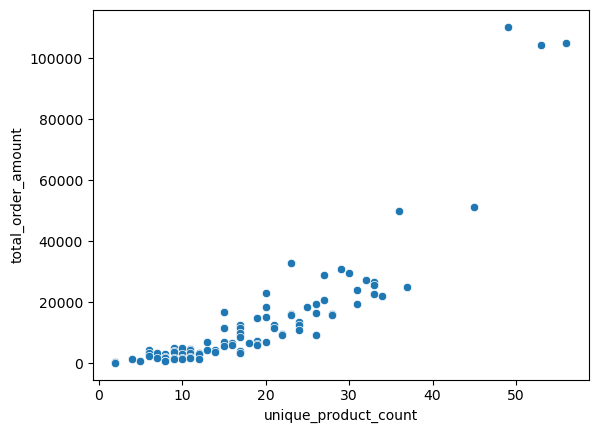

In [44]:
sns.scatterplot(x = df7.unique_product_count, y = df7.total_order_amount);

###  There is close relation between the number of different products and monetary return,  product diversification is expected to increase monetary return, so employees can make an effort towards product diversification.


### TOTAL SALES BY EMPLOYEE, NUMBER OF DIFFERENT PRODUCTS, NUMBER OF ORDERS AND NUMBER OF CUSTOMERS

In [45]:
sql= """
select o.employee_id, e.title, sum(od.unit_price*od.quantity*(1-od.discount))::integer as total_sales,
count(distinct od.product_id) as unique_product_count,
count(distinct od.order_id) as order_count,
count(distinct o.customer_id) as customer_count
from orders as o
left join order_details as od using(order_id)
left join employees as e using(employee_id)
group by 1,2
order by 3 desc
"""

In [46]:
df8= sqlio.read_sql_query(sql,conn)
df8

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employee_id,title,total_sales,unique_product_count,order_count,customer_count
0,4,Sales Representative,232891,75,156,75
1,3,Sales Representative,202813,74,127,63
2,1,Sales Representative,192108,72,123,65
3,2,"Vice President, Sales",166538,68,96,59
4,8,Inside Sales Coordinator,126862,70,104,56
5,7,Sales Representative,124568,67,72,45
6,9,Sales Representative,77308,53,43,29
7,6,Sales Representative,73913,57,67,43
8,5,Sales Manager,68792,52,42,29


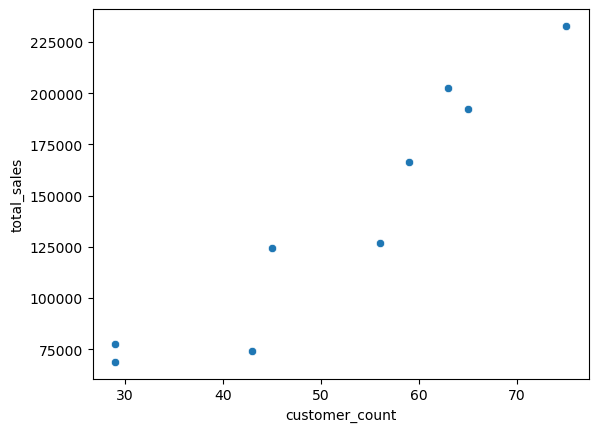

In [47]:
sns.scatterplot(y = df8.total_sales, x = df8.customer_count);

### The number of orders and total sales are almost directly proportional to the number of different products and the number of customers. Employees should be expected to work towards reaching new customers and increasing the product range.

## EMPLOYEE SHIPMENT DURATIONS

In [48]:
sql="""
select o.employee_id,title, sum(od.unit_price*od.quantity*(1-od.discount))::integer as total_sales,
count(distinct od.product_id) as unique_product_count,
count(distinct od.order_id) as order_count,
count(distinct o.customer_id) as customer_count,
round(avg(shipped_date-order_date), 1) as shipment_duration_days
from orders as o
left join order_details as od using(order_id)
left join employees as e using(employee_id)
where shipped_date is not null
group by 1,2
order by 7 desc
"""

In [49]:
df9=sqlio.read_sql_query(sql,conn)
df9

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employee_id,title,total_sales,unique_product_count,order_count,customer_count,shipment_duration_days
0,9,Sales Representative,76450,52,42,29,10.4
1,4,Sales Representative,225764,75,151,75,8.6
2,8,Inside Sales Coordinator,123843,69,100,55,8.6
3,6,Sales Representative,72528,57,65,42,8.5
4,3,Sales Representative,202813,74,127,63,8.5
5,7,Sales Representative,119619,67,69,45,8.3
6,2,"Vice President, Sales",162770,68,93,58,8.2
7,1,Sales Representative,187277,71,120,65,7.5
8,5,Sales Manager,68792,52,42,29,6.8


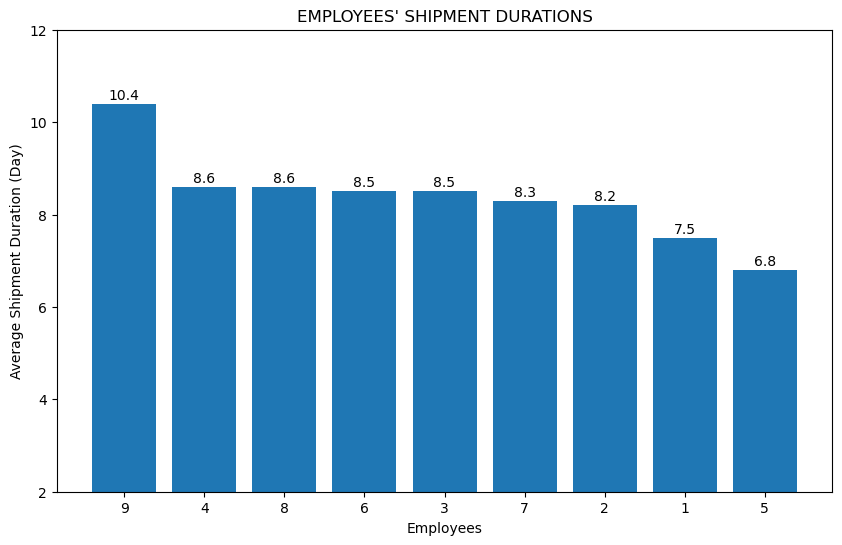

In [50]:

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(df9.employee_id)), df9.shipment_duration_days)
plt.title("EMPLOYEES' SHIPMENT DURATIONS")
plt.xlabel("Employees")
plt.ylabel("Average Shipment Duration (Day)")

plt.ylim(2, 12)

plt.xticks(range(len(df9.employee_id)), df9.employee_id)

for bar, sure in zip(bars, df9.shipment_duration_days):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{sure}', ha='center')

plt.show()